In [11]:
#引入模型
import joblib
model_pretrained=joblib.load('HousePrice.pkl')

import pandas as pd
df_test=pd.read_csv("test.csv")

#調整資料
df_test=df_test.loc[:,['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageCars']]
df_test.isnull().sum()
#測試資料中有缺失值需要補全才可預測
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].value_counts().idxmax(),inplace=True)
df_test['GarageArea'].fillna(df_test['GarageArea'].value_counts().idxmax(),inplace=True)
df_test['GarageCars'].fillna(df_test['GarageCars'].value_counts().idxmax(),inplace=True)
df_test.isnull().sum()

#預測
predictions2=model_pretrained.predict(df_test)
predictions2

#打包輸出
forSubmissionDF=pd.DataFrame(columns=['Id','SalePrice'])
forSubmissionDF['Id']=range(1461,2920)
forSubmissionDF['SalePrice']=predictions2
forSubmissionDF
forSubmissionDF.to_csv('for_submission_20231111.csv', index=False)

結果
===
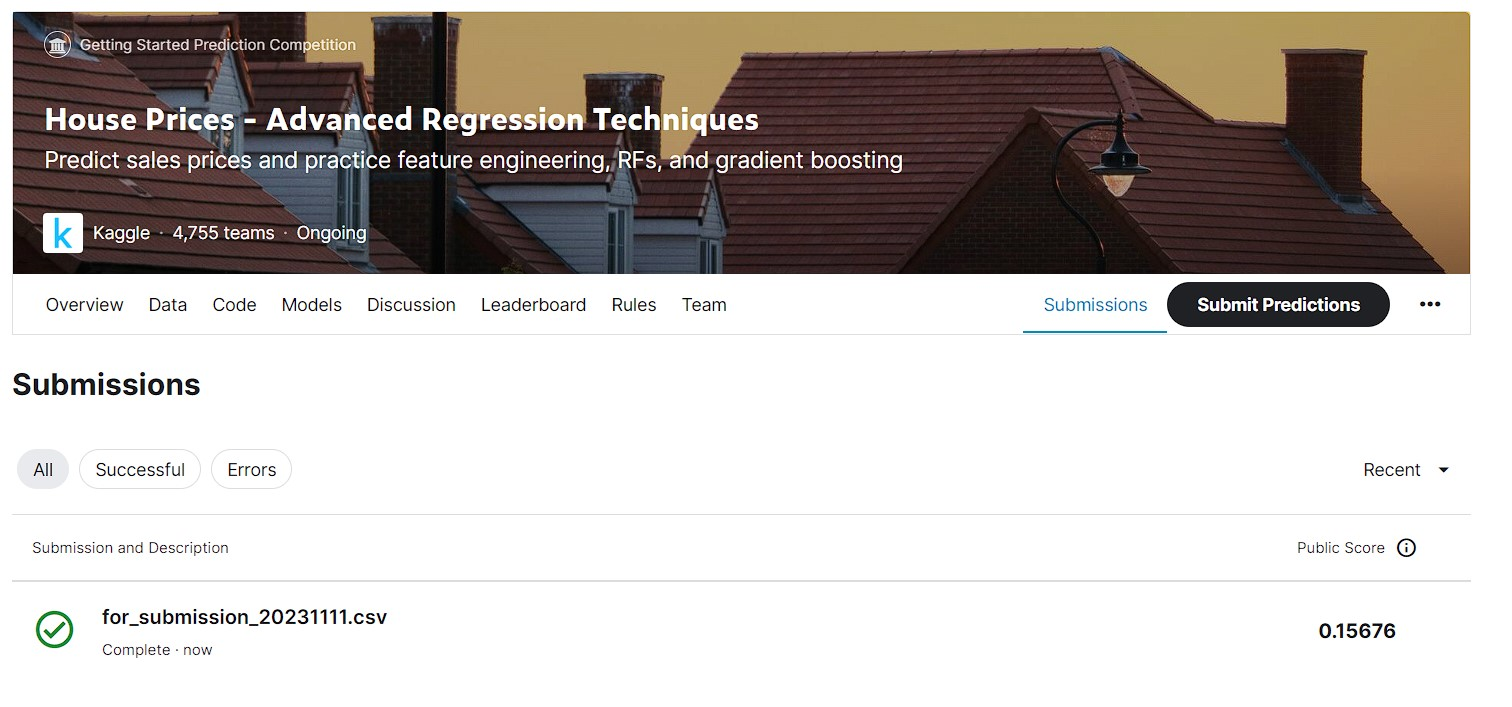
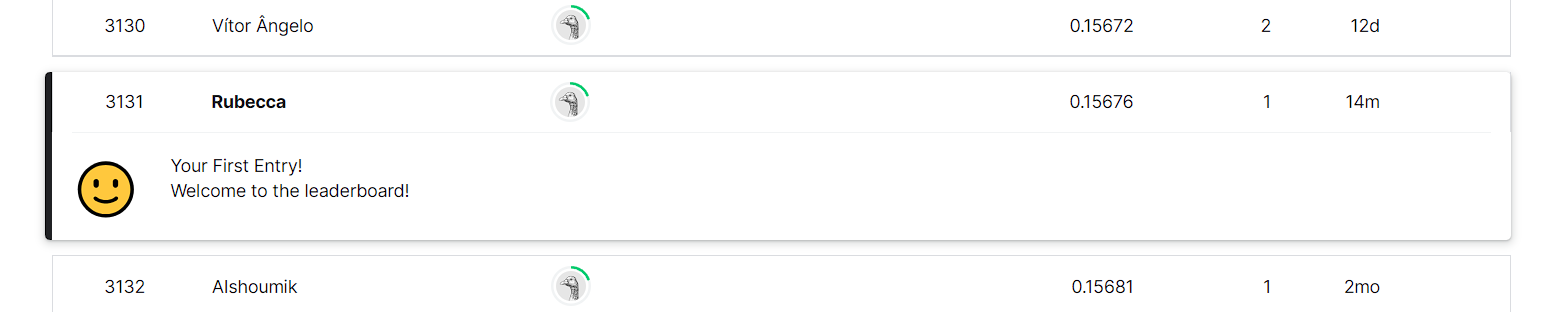
分析
===
整體評價偏低，整體模型的r2_sorce有達到0.85代表模型本身的預測還算準確，但模型預測的方向是錯誤的，推測的原因可能是因為我主要都是找有數字的資料沒有對一些特定資料進行轉換，而且因為沒有資料視覺分析的經驗導致在選擇訓練數據時也會有一定的錯誤，導致訓練出的模型雖然在那些訓練數據下得出的結果是準確，但在所數據中不一定準確。或許之後可以朝著將更多資料列入考量，來獲得更高的成績。
心得
===
這是第一次以自己的方式來參加競賽，雖然結果不是那麼好看，但我相信在之後可以更加精進自己的能力，讓競賽成績能夠進一步的提升。